In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

# path = 'data-sets/air_passengers.csv'
# data = pd.read_csv(path, index_col='Month')

data = sm.datasets.sunspots.load_pandas().data[['SUNACTIVITY']]
data.index = pd.date_range(start='1700', end='2009', freq='A')

from statsmodels.tsa.stattools import adfuller
result = adfuller(data['SUNACTIVITY'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')


ADF Statistic: -2.837781
p-value: 0.053076
Critical Values:


In [7]:
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

	1%: -3.452
	5%: -2.871
	10%: -2.572


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


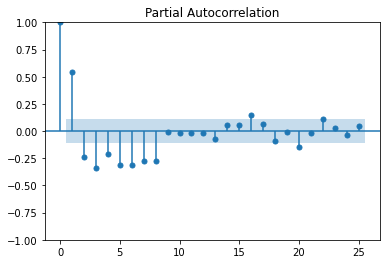

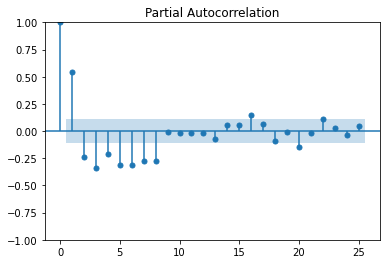

In [17]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data.SUNACTIVITY.diff().dropna())

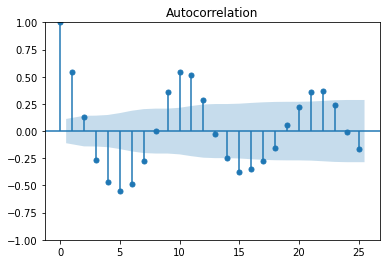

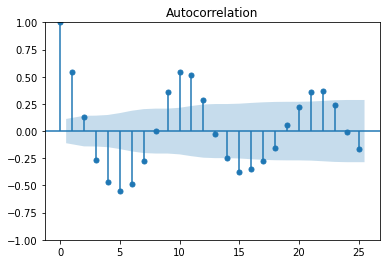

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.SUNACTIVITY.diff().dropna())

In [31]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data['1900':], order = (8,1,1))
model_fit = model.fit()

# p = 8 sectik cünkü pacf grafiğinde 8 den sonra oldukça fazla değişim görülüyor.

# q = 1 sectik cunku acf grafiginde 1'den sonra oldukca fazla degisim goruluyor.

# d = 1 sectik cünkü veride tren

predicted_data = model_fit.predict(start="1950", end="2008")
new_data = data['1950':]
new_data = new_data['SUNACTIVITY']

In [32]:
error = abs(np.divide((np.subtract(new_data.values, predicted_data.values)), new_data.values) * 100)
error_index = new_data.index

[1.80849822e+01 2.20248344e+01 3.67168821e+01 3.39737044e+01
 8.08483239e+01 4.06990759e+01 3.99671019e+01 7.25980743e+00
 9.79319405e+00 8.44408710e+00 6.65632893e+00 3.15566625e+01
 4.12134926e+01 1.50726758e+01 1.42391522e+02 1.48883103e+02
 4.47225420e+01 1.02755916e+01 2.70889842e+01 1.44955637e+01
 1.55258502e+01 2.34499784e+01 3.59221190e+01 2.64451079e+01
 2.49182220e+01 7.64450743e+01 1.76796620e+02 3.91644189e+01
 3.90659512e+01 2.02516291e+01 5.86184047e-01 6.76095315e+00
 1.71284158e+01 2.40794528e+01 2.58567767e+01 5.50820956e+01
 5.72328316e+00 9.27606330e+00 2.58193099e+01 9.38928208e+00
 2.48940080e+01 8.77055871e+00 2.18533036e+01 2.49290934e+01
 1.91940468e+01 2.15892206e+01 7.31692969e+01 2.32301190e+01
 7.33063458e+00 9.69808935e+00 5.24696513e+00 1.07108169e+01
 9.70915434e+00 1.82779986e+01 5.13558214e+00 3.34621429e+01
 5.01721152e+01 2.28286012e+02 8.31686812e+02]


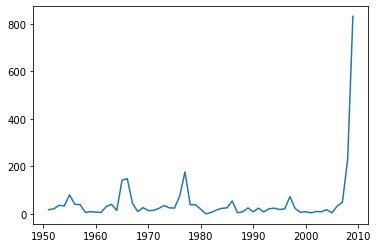

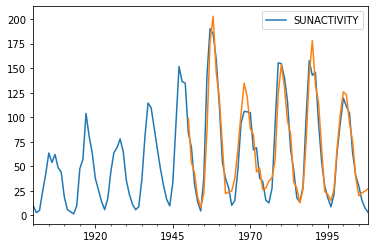

In [33]:
error_df = pd.DataFrame(error, error_index)
print(error)
plt.plot(error_df)

fig, ax = plt.subplots()

ax = data.loc['1900':].plot(ax=ax)
predicted_data.plot(ax=ax)


# plot_predict(model_fit, start="1950", end="2009", dynamic=False, ax=ax, plot_insample=True)
plt.show()